In [1]:
import os 
import pathlib
import cv2 as cv
import random 
import matplotlib.pyplot as plt
import albumentations as alb
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications import vgg16, MobileNet, xception, ResNet101V2, InceptionV3
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn 

In [3]:
MobileNet

<function keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=0.001, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000, classifier_activation='softmax', **kwargs)>

In [2]:
# loading image

win_url = pathlib.Path('emotion_image/')
win_url

images = list(win_url.glob('angry/*.png'))
sample = str(images[3])
sample

'emotion_image\\angry\\im11.png'

In [3]:
img = cv.imread(sample)
img = cv.resize(cv.imread(sample), (60, 60))
img.shape

(60, 60, 3)

In [4]:
import cv2

def add_centered_black_text(image, text, font_scale=0.5, thickness=2):
   
    img = image.copy()

    font = cv2.FONT_HERSHEY_SIMPLEX
    
    # Get text size
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)

    # Calculate coordinates for centered text
    x = (img.shape[1] - text_width) // 2
    y = (img.shape[0] + text_height) // 2  # y is the baseline for putText
    
    # Put black text (color=0) on the image at calculated position
    cv2.putText(img, text, (x, y), font, font_scale, color=0, thickness=thickness, lineType=cv2.LINE_AA)

    return img

captch_img = add_centered_black_text(img, 'gryan')
captch_img

array([[[ 44,  44,  44],
        [ 21,  21,  21],
        [  7,   7,   7],
        ...,
        [142, 142, 142],
        [157, 157, 157],
        [183, 183, 183]],

       [[ 27,  27,  27],
        [ 11,  11,  11],
        [ 10,  10,  10],
        ...,
        [132, 132, 132],
        [146, 146, 146],
        [159, 159, 159]],

       [[ 18,  18,  18],
        [  6,   6,   6],
        [ 20,  20,  20],
        ...,
        [115, 115, 115],
        [129, 129, 129],
        [142, 142, 142]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [156, 156, 156],
        [208, 208, 208],
        [215, 215, 215]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [149, 149, 149],
        [205, 205, 205],
        [218, 218, 218]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [144, 144, 144],
        [199, 199, 199],
        [220, 220, 220]]

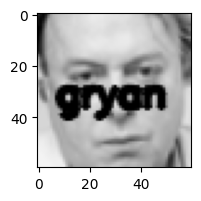

In [5]:
plt.figure(figsize=(2, 2))
plt.imshow(captch_img)

In [140]:
# loading sample images with randomize class text.... 

In [7]:
root_url = pathlib.Path('img_emo/train/')
root_url

WindowsPath('img_emo/train')

In [8]:

angry = [str(path) for path in list(root_url.glob('angry/*.*'))]
disgusted = [str(path) for path in list(root_url.glob('disgusted/*.*'))]
fearful = [str(path) for path in list(root_url.glob('fearful/*.*'))]
happy = [str(path) for path in list(root_url.glob('happy/*.*'))]
neutral = [str(path) for path in list(root_url.glob('neutral/*.*'))]
sad = [str(path) for path in list(root_url.glob('sad/*.*'))]

angry[:5]

['img_emo\\train\\angry\\im0.png',
 'img_emo\\train\\angry\\im1.png',
 'img_emo\\train\\angry\\im10.png',
 'img_emo\\train\\angry\\im100.png',
 'img_emo\\train\\angry\\im1000.png']

In [9]:
sad[:3]

['img_emo\\train\\sad\\im0.png',
 'img_emo\\train\\sad\\im1.png',
 'img_emo\\train\\sad\\im10.png']

In [10]:
img_path = {
    'angry': angry,
    'disgusted': disgusted, 
    'fearful': fearful, 
    'happy': happy,
    'neutral': neutral, 
    'sad': sad 
}

img_tag = {
    'angry': [],
    'disgusted': [], 
    'fearful': [], 
    'happy': [],
    'neutral': [], 
    'sad': []

}

img_tag_encode = {
    'angry': 0,
    'disgusted': 1, 
    'fearful': 2, 
    'happy': 3,
    'neutral': 4, 
    'sad': 5

}

# holding shuffled emotion text
text_emo = {
    'angry': [],
    'disgusted': [], 
    'fearful': [], 
    'happy': [],
    'neutral': [], 
    'sad': []
}

# holding actual image file 
img_text_emo ={
    'angry': [],
    'disgusted': [], 
    'fearful': [], 
    'happy': [],
    'neutral': [], 
    'sad': []
}  


# holding actual image file 
img_emo ={
    'angry': [],
    'disgusted': [], 
    'fearful': [], 
    'happy': [],
    'neutral': [], 
    'sad': []
} 

In [11]:
# getting a shuffle text of the 
def shuffle_label(label):
    text = list(label)
    random.shuffle(text)
    return ''.join(text)

shuffle_label('hello')

'holel'

In [12]:
# loading images... 
for tag, paths in img_path.items(): 
    for path in paths:

        # add label 
        img_tag[tag].append(tag)

        # load text emotion tag (shuffled....
        shuffled_txt = shuffle_label(tag)
        text_emo[tag].append(shuffled_txt) 

        # load main image
        img = cv.resize(cv.imread(path), (60,60))
        img_emo[tag].append(img)

        # load img_text_emo image... 
        captcha_img = add_centered_black_text(img, shuffled_txt)
        img_text_emo[tag].append(captcha_img)

    print(f'Load Complete for .......{tag}  ... Total {len(paths)}')

print('loading completed...... ')

Load Complete for .......angry  ... Total 3995
Load Complete for .......disgusted  ... Total 436
Load Complete for .......fearful  ... Total 4097
Load Complete for .......happy  ... Total 7215
Load Complete for .......neutral  ... Total 4965
Load Complete for .......sad  ... Total 4830
loading completed...... 


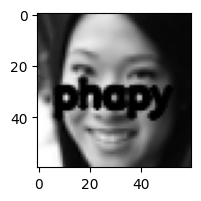

In [13]:
plt.figure(figsize=(2, 2))
plt.imshow(img_text_emo['happy'][50])

In [14]:
# generate a random number.. 
def get_rand(end):
    return random.randrange(0, end)

img_text_emo['happy'][50].shape

(60, 60, 3)

In [15]:
rows = len(img_text_emo.keys())
cols = 4
list(range(rows))
classes = img_text_emo.keys()
classes

dict_keys(['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad'])

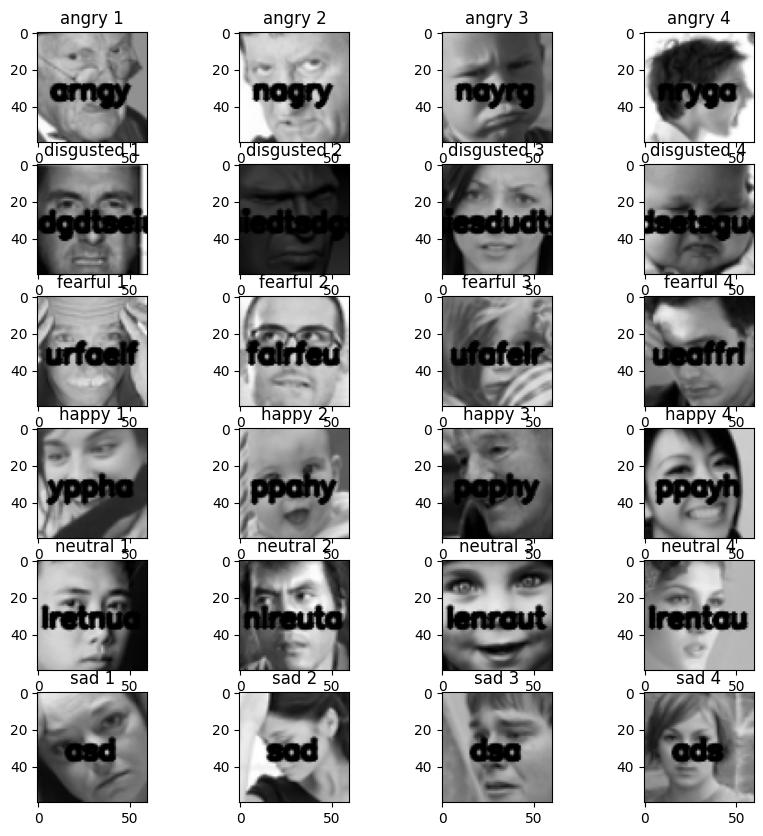

In [18]:
# visualization.... 
rows = len(img_text_emo.keys())
cols = 4
classes = list(img_text_emo.keys())

# plot
fig, ax = plt.subplots(nrows=rows , ncols=cols, figsize=(10,10))
# fig.tight_layout()
for row in range(rows):
    for col in range(cols): 
        rand_index = get_rand(len(img_path[classes[row]]))
        ax[row, col].set_title(f'{classes[row]} {col + 1}')
        ax[row, col].imshow(img_text_emo[classes[row]][rand_index])
        


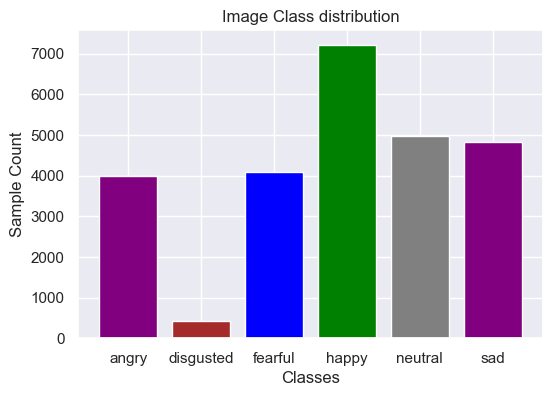

In [16]:
import pandas as pd
import seaborn as sn

sn.set_theme()
plt.figure(figsize=(6,4))
plt.bar(x=text_emo.keys(), height=[ len(emo) for emo in text_emo.values()], color=['purple', 'brown', 'blue', 'green', 'gray'])
plt.title('Image Class distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Count')
plt.show()

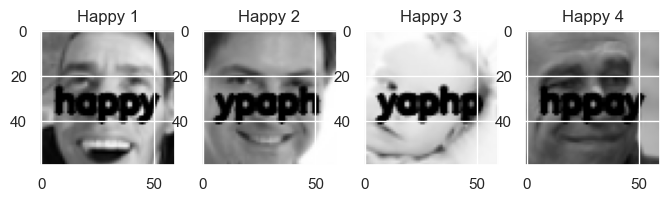

In [89]:
fig, ax = plt.subplots(ncols=4, figsize=(8,8))
for index in range(4):
    rand_index = get_rand(len(img_path['happy']))
    ax[index].set_title(f'Happy {index + 1}')
    ax[index].imshow(img_text_emo['happy'][rand_index])
    

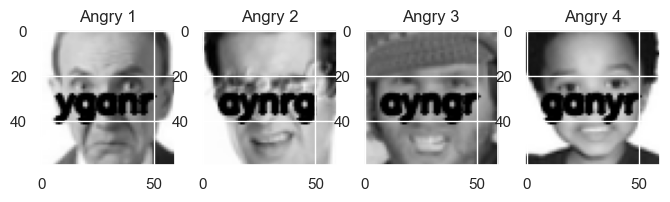

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(8,8))
for index in range(4):
    rand_index = get_rand(len(img_path['angry']))
    ax[index].set_title(f'Angry {index + 1}')
    ax[index].imshow(img_text_emo['angry'][rand_index])

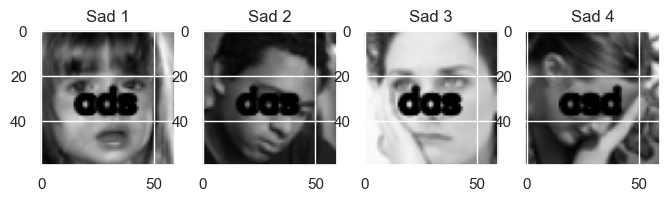

In [91]:
fig, ax = plt.subplots(ncols=4, figsize=(8,8))
for index in range(4):
    rand_index = get_rand(len(img_path['sad']))
    ax[index].set_title(f'Sad {index + 1}')
    ax[index].imshow(img_text_emo['sad'][rand_index])

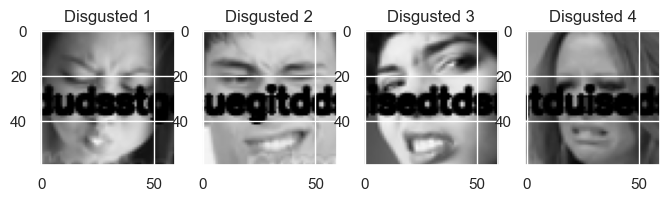

In [92]:
fig, ax = plt.subplots(ncols=4, figsize=(8,8))
for index in range(4):
    rand_index = get_rand(len(img_path['disgusted']))
    ax[index].set_title(f'Disgusted {index + 1}')
    ax[index].imshow(img_text_emo['disgusted'][rand_index])

In [17]:
# processing the images...
img_augmentation = alb.Compose([alb.HorizontalFlip(p=0.5), 
            alb.RandomBrightness(), 
            alb.RandomBrightnessContrast(), 
            alb.RandomGamma()])
img_augmentation

Compose([
  HorizontalFlip(always_apply=False, p=0.5),
  RandomBrightness(always_apply=False, p=0.5, limit=(-0.2, 0.2)),
  RandomBrightnessContrast(always_apply=False, p=0.5, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True),
  RandomGamma(always_apply=False, p=0.5, gamma_limit=(80, 120), eps=None),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)

In [18]:
sample_image = img_text_emo['happy'][0]

# let transform a sample image
aug_image = img_augmentation(image= sample_image)['image']
aug_image

array([[[76, 76, 76],
        [77, 77, 77],
        [75, 75, 75],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [77, 77, 77]],

       [[77, 77, 77],
        [77, 77, 77],
        [76, 76, 76],
        ...,
        [81, 81, 81],
        [81, 81, 81],
        [80, 80, 80]],

       [[77, 77, 77],
        [78, 78, 78],
        [77, 77, 77],
        ...,
        [82, 82, 82],
        [84, 84, 84],
        [82, 82, 82]],

       ...,

       [[69, 69, 69],
        [72, 72, 72],
        [66, 66, 66],
        ...,
        [71, 71, 71],
        [69, 69, 69],
        [67, 67, 67]],

       [[73, 73, 73],
        [71, 71, 71],
        [70, 70, 70],
        ...,
        [74, 74, 74],
        [71, 71, 71],
        [68, 68, 68]],

       [[69, 69, 69],
        [68, 68, 68],
        [93, 93, 93],
        ...,
        [77, 77, 77],
        [77, 77, 77],
        [70, 70, 70]]], dtype=uint8)

In [19]:
aug_image.shape

(60, 60, 3)

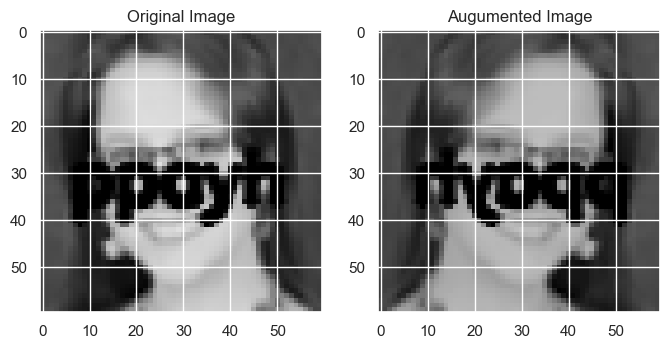

In [20]:
# plot original image and aug image
fig, ax = plt.subplots(ncols=2, figsize=(8,8))
# org
ax[0].set_title('Original Image')
ax[0].imshow(sample_image)
# aug
ax[1].set_title('Augumented Image')
ax[1].imshow(aug_image)

In [21]:
class_size = np.array([len(emo) for emo in img_text_emo.values()])
print(class_size.max())
aug_size = dict(zip(img_text_emo.keys(), np.array([class_size.max()-x for x in class_size ])))
aug_size

7215


{'angry': 3220,
 'disgusted': 6779,
 'fearful': 3118,
 'happy': 0,
 'neutral': 2250,
 'sad': 2385}

In [ ]:
def get_rand(end):
    return random.randrange(0, end)


def get_augmentation(sample_image):
    # let transform a sample image
    aug_image = img_augmentation(image= sample_image)['image']
    return aug_image

In [23]:
len(img_text_emo['angry'])

3995

In [24]:
# img_text_emo
for tag, size in aug_size.items(): 
    for index in range(size): 
        random_index = get_rand(len(img_text_emo[tag]))
        random_img = img_text_emo[tag][random_index]
        augmented_img = get_augmentation(random_img)

        img_text_emo[tag].append(augmented_img)
        img_tag[tag].append(tag)
    print(f'{size} augment image is generated for {tag}')
print('augmentation process completed')

3220 augment image is generated for angry
6779 augment image is generated for disgusted
3118 augment image is generated for fearful
0 augment image is generated for happy
2250 augment image is generated for neutral
2385 augment image is generated for sad
augmentation process completed


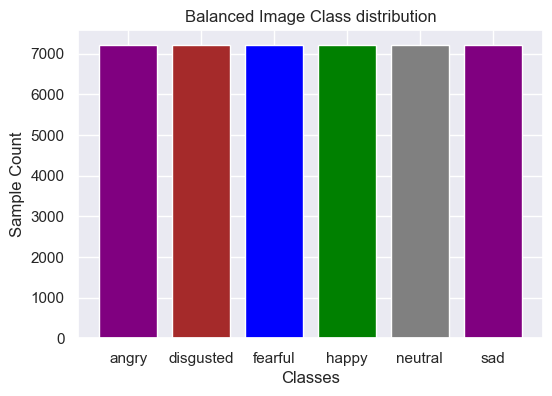

In [25]:
sn.set_theme()
plt.figure(figsize=(6,4))
plt.bar(x=img_text_emo.keys(), height=[ len(tag) for tag in img_text_emo.values()], color=['purple', 'brown', 'blue', 'green', 'gray'])
plt.title('Balanced Image Class distribution')
plt.xlabel('Classes')
plt.ylabel('Sample Count')
plt.show()

In [31]:
X = []
y = []
y_encode = []


for tag, image in img_text_emo.items(): 
    for img in image: 
        X.append(img)
        y.append(tag)
        y_encode.append(img_tag_encode[tag])


print('Loaded completed')

Loaded completed


In [32]:
X = np.array(X)
y = np.array(y)
y_encode = np.array(y_encode)
X.shape

(43290, 60, 60, 3)

In [33]:
y.shape

(43290,)

In [35]:
img_tag_encode

{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5}

Label code : 0


Text(0.5, 1.0, 'angry')

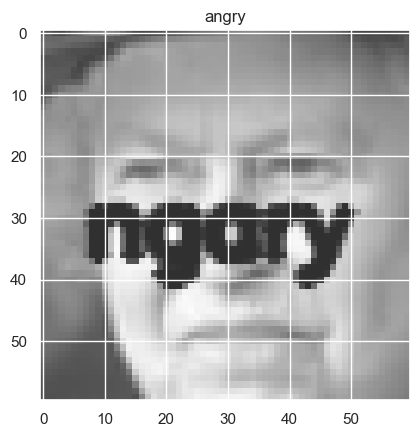

In [44]:
index = get_rand(10000)
print(f'Label code : {y_encode[index]}')
plt.imshow(X[index])
plt.title(y[index])


In [45]:
print(y[:5])
print(y_encode[:5])

['angry' 'angry' 'angry' 'angry' 'angry']
[0 0 0 0 0]


In [115]:
print(y.shape)
X.shape

(43290,)


(43290, 60, 60, 3)

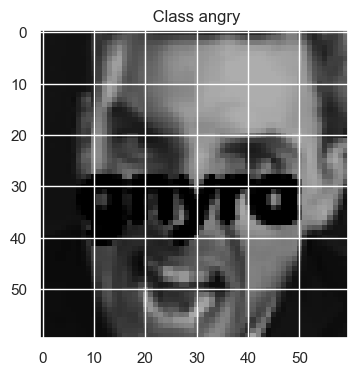

In [47]:
index = get_rand(len(y))
plt.figure(figsize=(4, 4))
plt.title(f' Class {y[index]}')
plt.imshow(X[index])
plt.show()

In [48]:
# data splitting 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.shape

(34632, 60, 60, 3)

In [49]:
y_test.shape

(8658,)

#### MODEL DEVELOPMENT AND CAPTCHA ROBUSTNESS TEST

In [123]:
vgg_weight = vgg16.VGG16(weights = 'imagenet', include_top = False) 
vgg_weight.summary()

for layer in vgg_weight.layers:
    layer.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
SHAPE = (60, 60,3)

# input layer
input_layer = keras.layers.Input(shape=SHAPE)

# vgg16 model layers 
vgg_output = vgg_weight(input_layer)

# dense layer..... costomized layer for image classification
output = keras.layers.GlobalMaxPooling2D()(vgg_output)
output1 = keras.layers.Dense(1024, activation='relu')(output)
output2 = keras.layers.Dense(256, activation='relu')(output1)
final_output = keras.layers.Dense(7, activation='sigmoid')(output2)

# build the model
fed_model_VGG16 = keras.models.Model(inputs=[input_layer], outputs=[final_output])

# compile model
# COMPILATION PARAMETER
fed_model_VGG16.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)


# summary of the functional custome dataset
fed_model_VGG16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 60, 60, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_max_pooling2d_2 (Glo  (None, 512)              0         
 balMaxPooling2D)                                                
                                                                 
 dense_6 (Dense)             (None, 1024)              525312    
                                                                 
 dense_7 (Dense)             (None, 256)               262400    
                                                                 
 dense_8 (Dense)             (None, 7)                 1799      
                                                           

In [ ]:
fed_model_VGG16_history = fed_model_VGG16.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1083/1083 [==============================] - 2431s 2s/step - loss: 0.6562 - accuracy: 0.7386 - val_loss: 0.5322 - val_accuracy: 0.7896
Epoch 2/10
1083/1083 [==============================] - 1251s 1s/step - loss: 0.5242 - accuracy: 0.7943 - val_loss: 0.5829 - val_accuracy: 0.7635
Epoch 3/10
1083/1083 [==============================] - 1605s 1s/step - loss: 0.4687 - accuracy: 0.8158 - val_loss: 0.4853 - val_accuracy: 0.8136
Epoch 4/10
 166/1083 [===>..........................] - ETA: 20:20 - loss: 0.3980 - accuracy: 0.8447

: 

In [ ]:
history = fed_model_VGG16_history.history.history

pd.DataFrame(fed_model_VGG16_history.history.history).plot()
plt.title('VGG16 Training & Validation : Accuracy & Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Acc & Loss Val')
plt.show()

# ddddddddddddddddddddddwhat is the description of the natural d

In [ ]:
Mo